# Homework 2
### Due: End of Day Sunday March 5th, 2023
### Tristan Larkin

## Problem 1
In the lectures, we discussed the problem of optimizing matrix chain multiplication using dynamic
program. The twist of this problem is that we shall assume that we have a special “hardware
accelerator” than can calculate inner product in $O(1)$ time. Now observe that with this special
hardware, multiplying two matrices $A_{m \times n}$ and $B_{n \times k}$ will only takes $O(mk)$ time instead of the usual
$O(mnk)$ time. Discuss that if there is a better algorithm to minimize matrix chain operations under
this new hardware.

The regular problem of multiplying two matricies $A_{m \times n}$ and $B_{n \times k}$ is $O(mnk)$ because each new element form the matrix will result in the multiplication of $n$ elements (the $n$ elements per row of $A$ and the $n$ elements per column of $B$) and the resultant matrix will have $mk$ elements, totalling to $mnk$ multiplications, and since the additions are cheaper per addition and on around the same rate of growth the time becomes $O(nmk)$. If we have constant time dot products then we can cut out that middle $n$ because it no longer takes $O(n)$ time to get each new element, it is just $O(1)$ $mk$ times.

The regular problem of multiplying $i$ matrixes has a naive approah of multiplying each matrix in order:

$$ ABCD = ((AB)C)D$$

but there might be a more efficient approach since matrix multiplication for an $ m \times n $ times an $ m \times k $ has times complexity $O(mnk)$. If we chain these for say matrixes of sizes $ \{a \times b, b \times c, c \times d, d\times e\} $, we would get time $O(abc + acd + ade)$. But what if $a$ is very large? That would then be a poor choice because $a$ appears a lot in the time complexity. If $a$ is very large and $b$ is very small we would want to then multiple in a different order (which of couse means putting parenthesis in the proper places, not rearanging the matricies).

$$ ABCD = A((BC)D) $$

This ordering would have a time complexity of $O(bcd + bde + abe)$, which has decreaed the number of times $a$ is multiplied and increased the number of times $b$ is multiplied. The actual algorithm is defined recursively by the call

$$ f(A,B,C,D) = \min\{f(A) + f(B,C,D) + T_{A, BCD}, ..., f(A,B,C) + f(D) + T_{ABC, D}\} $$

Where $T_{Q,P}$ is the time it takes to multiply a matrix $Q$ by a matrix $P$. In our original problem these will depend on the three dimesions $m$, $n$, and $k$. The function $f$ also has some interesting cases:

$$ f(X) = 0 \Rightarrow f(Q,P) = T_{Q,P} $$

How is the problem different when the inner product of optimized? Well the multiplication of two matricies no longer depend on the value of $n$ (where the two matricies are of sizes $m \times n$ and $n \times k$), so for any $f(A,B,C,...)$ all the values of $T_{Q,P}$ will be the same, and can be pulled out of the $\min$ statement.

$$ f(A,B,C,D) = \min\{f(A) + f(B,C,D), ..., f(A,B,C) + f(D)\} + T_{ABCD} $$

 

## Problem 2
We have discussed the divide-and-conquer polynomial multiplication algorithm, where each poly-
nomial is partitioned into the high half and lower half. What if we partition the polynomials
according to the index is even or odd. Will the divide-and-conquer approach still work? Explain
why or why not.

Say we have polynomials $ p_a = a_0 + a_1 x + a_2 x^2 + ... + a_n x^n$ and $ p_b = b_0 + b_1 x + b_2 x^2 + ... + b_n x^n$ and want the product $p_a p_b$. We can split the polynomials into a sum of smaller polynomials.

$$ p_a p_b = (a_0 + a_1 x + a_2 x^2 + ... + a_n x^n)(b_0 + b_1 x + b_2 x^2 + ... + b_n x^n)$$

$$ = ((a_0 + ... + a_{\frac{n}{2}-1}x^{\frac{n}{2}-1})+(a_{\frac{n}{2}}x^{\frac{n}{2}} + ... + a_n x^{n}))
     ((b_0 + ... + b_{\frac{n}{2}-1}x^{\frac{n}{2}-1})+(b_{\frac{m}{2}}x^{\frac{n}{2}} + ... + b_m x^{n})) $$

$$ = ((a_0 + ... + a_{\frac{n}{2}-1}x^{\frac{n}{2}-1})+(a_{\frac{n}{2}} + ... + a_n x^{\frac{n}{2}})x^{\frac{n}{2}})
     ((b_0 + ... + b_{\frac{n}{2}-1}x^{\frac{n}{2}-1})+(b_{\frac{m}{2}} + ... + b_m x^{\frac{n}{2}})x^{\frac{n}{2}}) $$

Then we continue this pattern with each new smaller polynomial until they are all of order 0 or $m$. Then it will be in the form:
$$ p = (a + bx^m)(c + dx^m) $$
Where $a, b, c, \text{and } d$ are all of the same form. Then we can take advantage of the following property.

$$ p = (a + bx^m)(c + dx^m) = adx^{2m} + (ad + bc)x^m + ac $$
$$ (a + b)(c + d) = ac + ad + bc + bd $$
$$ (a + b)(c + d) - ac - bd = ad + bc $$
$$ p = adx^{2m} + (ad + bc)x^m + ac = adx^{2m} + ((a + b)(c + d) - ac - bd)x^m + ac $$

Which means we can get the new polynomial with only three multiplications: $(a + b)(c + d), ac, \text{and } bd$

Above we set it up where we split the polynomial between the $\frac{m}{2}-1$ degree term and $\frac{m}{2}$ degree term, but what if we split it every other term? Lets assume $n$ is odd.

$$ p_a p_b = (a_0 + a_1 x + a_2 x^2 + ... + a_n x^n)(b_0 + b_1 x + b_2 x^2 + ... + b_n x^n)$$

$$ = ((a_0 + a_2 x^2 + ... + a_{n-1} x^{n-1})+(a_{1} x + a_{3} x^3 + ... + a_n x^{n}))
     ((b_0 + b_2 x^2 + ... + b_{n-1} x^{n-1})+(b_{1} x + b_{3} x^3 + ... + b_n x^{n})) $$

$$ = ((a_0 + a_2 x^2 + ... + a_{n-1} x^{n-1})+(a_{1} + a_{3} x^2 + ... + a_n x^{n-1})x)
     ((b_0 + b_2 x^2 + ... + b_{n-1} x^{n-1})+(b_{1} + b_{3} x^2 + ... + b_n x^{n-1})x) $$

Just like with the upper and lower half split, this split gaurantees all the odd terms have a higher degree, and can be taken out to make a value $(a + bx)$ where $a$ and $b$ are of the same degrees. This lets us perform the same divide and conquer method as above, since we are making smaller polynomials.

## Problem 3
The input is a set of intervals on the $X$−axis, which are represented by their two endpoints.
Design an algorithm to identify all intervals that are contained in another interval from the set.
The algorithm should run in $O(n \log{n})$ time.

Lets make a test case and try some sorting to see what we can get.
```
               -----------------------
    --------
        -------------------
                          -----------
                ---------
                    --------------
         --
```
Sorted by first 
```
    --------
        -------------------
         --
               -----------------------
                ---------
                    --------------
                          -----------
```

If we look at the "sorted by first" chart we can see that the first element cannot be contained by any other element because nothing starts at a smaller $X$ value. We will record the high value and move on to the next interval. That interval is also not contained by any other, because the high value is higher than the recorded high value. We will record that new high value and move to the next. This one is contained by a previous, since we know all previous will have a smaller low and the recorded high is larger than this one's. No element will ever be contained by another element after it in the sorted list because the low $X$ value will always be higher the further down the list. This is $O(n \log{n})$ for the sorting and $O(n)$ for the search through, that puts the total time complexity at $O(n \log{n})$.

If we standardize this into a generic list of steps:
1. Sort the intervals based on the lower $X$ value
2. Save the value of the high end of the first element
3. Iterate through the rest of the list 
    - storing that the current element is contained by another interval if the high end is less than the saved one
    - save the new high end if it is greater than the previously saved one

```js
function contained_intervals(intervals: list of tuples representing intervals) {
    sorted_intervals = sort intervals by first element in each tuple
    high = sorted_intervals[0][1] // the high value of the first element in sorted_intervals
    solutions = {} // empty list or set
    
    // interval[0] is the lower end and interval[1] is the higher end
    for interval in sorted_intervals (not including the first element): 
        if  interval[1] < high:
            add interval to solutions
        if interval[1] > high:
            high = interval[1]
}
```

## Problem 4
Modify the radix sort algorithm to work for variable-length strings. In other words, you can no
longer assume that all the numbers have exactly $k$ digits. Some numbers maybe long and some
maybe short. It is of course possible to pad all the numbers with “dummy” 0−digits to make
them all of the same length. Design an efficient algorithm that avoids doing so and achieves a
running time linear in the total number of digits.

We want a variation of the radix sort algorithm that will alphabetically sort a list of $k$ words with a total of $n$ letters in all the words combined. We can start by counting the number of letters in each word and storing that, which in the worst case implementation of a "word" will take $O(n)$ time. 

## Problem 5
Let $A = (a_1,a_2,...,a_n)$ be a sequence of numbers. Another sequence $Z = (z_1,z_2,...,z_m), m \leq n$
is a sub-sequence of $A$ if there exists a strictly increasing sequence $(i_1,i_2,...,i_k)$ of indices of $A$
such that for all $j = 1,2,...,k, z_j = A_{i_j}$. More intuitively, the sequence $Z$ is obtained by deleting
some numbers from $A$ without changing the order of the remaining numbers. For example, if
$A = (1,3,5,7,9,11)$, then $Z = (3,9,11)$ is a sub-sequence of $A$.\
\
Design an $O(n^2)$ dynamic programming algorithm to find the longest monotonically increasing
sub-sequence of a sequence of $n$ numbers.

This problem is actually pretty similar to the knapsack problem. The two options we need to maximize between are:

    - If the last item in the set is less than the max, take it, making that number the max going forward
    - Remove the last item in the set but do not take it, kepping the current max
    
And we will start with all the items $A = \{a_1, a_2, ..., a_{n-1}, a_n\}$ and a max at infinity ($m= \infty$). 
$$ L(A, m) = \max(1 + L(\{a_1, a_2, ..., a_{n-1}\}, a_n), L(\{a_1, a_2, ..., a_{n-1}\}, m)) $$
$$ L(\{\}, m) = 0 $$
This is the formula to find the size of the largest possible sub-sequence, and can be easily altered to actually give the largest. Reminder that we can only do the "take" action if $a_n < m$. We can build a table for these values, starting with the empty set and trying with the max set to each value of $A$ and $\infty$, where rows are the current set, increasing in size by one each row down, and columns are the max values. This first row will of couse all be zeros as given by our base case above. The if we call our table $L$ then an element in the table will be given by $L(A, m)=L(\{a_1, a_2, ..., a_n\}, m)$. That means the two possible options for the next step in the recursion are two elements on the row above, one being right above and the other above and some distance to the left. In the end we will have a table full of numbers where the center diagonal represents the size of the largest subsequence, and we can just walk up that diagonal and save each number that is one smaller than the last we saved.

Here is the algorithm that would give us the table:

```js
function longest_subsequence(A: an array of numbers) {
    n = length of A
    L = empty (n+1) by (n+1) array // n+1 because we want a row for the empty set and a column for infinity
    for row = 1 to (n + 1):
        current element = the element just added to this row
        for column = row to (n + 1): // we can ignore the lower left triangle in the table 
            m = this columns maximum (i.e. A[row] or infinity for the last iteration)
            if current element >= m:
                L[row, column] = L[row-1, column] // the element above
            else: 
                // [row-1, row-1] will be the elements on the largest diagonal
                L[row, column] = max (L[row-1, column], L[row-1, row-1] + current element)
    high = last element in the table // i.e. L[n+1, n+1]
    for i = n to 0:
        if the ith center diagonal or L[i][i] = (high - 1):
            add A[i] to the solution and decrement high
}
```

In [9]:
# Here is an example and the python code to generate the example
from tabulate import tabulate 
from numpy import inf
import numpy as np

def max_len(l1:list, l2:list) -> list:
    if len(l1) > len(l2):
        return l1
    else:
        return l2

def longest_subsequence(A:list[int]) -> list[int]:
    n = len(A)
    # L = [[""] * (n+1) for _ in range(n+1)] # initialize the empty table
    L = [[0] * (n+1) for _ in range(n+1)] # initialize the empty table
    for row, curr_elem in enumerate(A, start=1):
        for col, m in enumerate(A[row:], start=row):

            if curr_elem >= m:
                L[row][col] = L[row-1][col]
            else:
                # L[row][col] = max_len(L[row-1][col], (L[row-1][row-1] + str(curr_elem)))
                L[row][col] = max(L[row-1][col], (L[row-1][row-1] + 1))

        # L[row][n] = max_len(L[row-1][n], L[row-1][row-1] + str(curr_elem))
        L[row][n] = max(L[row-1][n], L[row-1][row-1] + 1)
    
    high = L[n][n]
    solution = []
    for i in reversed(range(n)):
        if L[i][i] == high - 1:
            solution.append(A[i])
            high -= 1
    
    print(tabulate(L, headers=A+["INF"], showindex=["EMPTY"]+A))
    print()
    print(f"The solution for the longest sub-sequence is {[x for x in reversed(solution)]}")

longest_subsequence([1,5,6,2,9,5,6,7,3,4,8,9,0])

         1    5    6    2    9    5    6    7    3    4    8    9    0    INF
-----  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  -----
EMPTY    0    0    0    0    0    0    0    0    0    0    0    0    0      0
1        0    1    1    1    1    1    1    1    1    1    1    1    0      1
5        0    0    2    1    2    1    2    2    1    1    2    2    0      2
6        0    0    0    1    3    1    2    3    1    1    3    3    0      3
2        0    0    0    0    3    2    2    3    2    2    3    3    0      3
9        0    0    0    0    0    2    2    3    2    2    3    3    0      4
5        0    0    0    0    0    0    3    3    2    2    3    3    0      4
6        0    0    0    0    0    0    0    4    2    2    4    4    0      4
7        0    0    0    0    0    0    0    0    2    2    5    5    0      5
3        0    0    0    0    0    0    0    0    0    3    5    5    0      5
4        0    0    0    0    0    0    0    0    0    0    5    

In the above table for a run on the set $\{1,5,6,2,9,5,6,7,3,4,8,9,0\}$ you can see that the bottom element is the longest sub-sequence. Since we are just bulding half of a $(n+1) \times (n+1)$ table it is $O(n^2)$.

## Problem 6
Simulating Bellman-Ford and Floyd-Warshall algorithms using the following graph. In the case
of Bellman-Ford algorithm, use vertex 0 as the source.

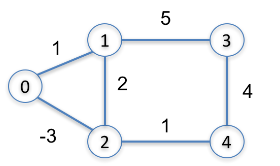

We will perform Bellman-Ford and will look at each edge on the verticies with increasing index numbers.
|Action|0|1|2|3|4|
|-|-|-|-|-|-|
|Init|0|$\infty$|$\infty$|$\infty$|$\infty$|
|Vertex 0|0|1|-3|$\infty$|$\infty$|
|Vertex 1|0|1|-3|6|$\infty$|
|Vertex 2|-6|-1|-3|6|-2|
|Vertex 3|-6|-1|-3|6|-2|
|Vertex 4|-6|-1|-3|2|-2|
|Vertex 0|-6|-5|
|Vertex 1|
|Vertex 2|
|Vertex 3|
|Vertex 4|

If I want to use this graph I will store it as an adjacency list.

In [13]:
import numpy as np

edges = [(0,1,1),(1,0,1),(1,3,5),(3,1,5),(0,2,-3),(2,0,-3),
         (1,2,2),(2,1,2),(2,4,1),(2,4,1),(3,4,4),(4,3,4)] # directed
v = [0,1,2,3,4]

distances = [np.inf] * len(v)
distances[0] = 0



## Problem 7
The Bellman-Ford algorithm for single-source shortest paths on a graph $G(V,E)$ as discussed
in class has a running time of $O|V|^3$, where $|V|$ is the number of vertices in the given graph.
However, when the graph is sparse $(|E| << |V|^2)$, then this running time can be improved
to $O(|V||E|)$. Describe how how this can be done.

## Problem 8
Let $G(V,E)$ be an undirected graph such that each vertex has an even degree. Design an
$O(|V|+|E|)$ time algorithm to direct the edges of $G$ such that, for each vertex, the outdegree is
equal to the indegree.

## Problem 9
Consider a connected undirected graph $G(V,E)$. Answer the following questions:\
\
(a) Prove that the graph $G$ contains a vertex $v$ such that removing $v$ and all of its incident
edges will **not** disconnect $G$.\
\
(b) Design a linear time algorithm to find such a vertex.

(a) If the connected graph $G$ has $|V|$ verticies and $|E|$ edges, then the minimum number of edges it can have to be connected is $|V|-1$. That means that any connected graph with $|V|$ verticies can have verticies removed until it is an $|V|-1$ number of verticies. Since there are $|V|-1$ edges and each edge connects two verticies that means there are $2(|V|-1) = 2|V| - 2$ connections to verticies, which means there are not enough connections for each vertex to have two connections. By this we know that at least 2 verticies will only have one connection and those verticies can be removed without creating a disconected graph since no path to any other vertex an have this one be as a "stop" along the way.

(b) We know that if we find a node with one edge then it can be removed without disconecting the rest of the graph. Also we know that if we find one path from one vertex to another then any edges between them are not required for a connected graph. By this if we start at an arbitrary vertex and take one path 

## Problem 10
Suppose you are given $n$ positive integers $d_1,d_2,...,d_n$ such that $d_1 + d_2 + ... + d_n = 2n −2$.
Answer the following questions:\
\
(a) Prove that there is a tree of $n$ vertices with vertex degrees $d_1,d_2,...,d_n$.\
\
(b) Design an algorithm to construct such a tree.

## Problem 11
Arbitrage is the use of discrepancies in currency exchange rates to transform one unit of currency
into more than one unit of the same currency. Hypothetically, suppose that 1 US dollar buys
46.4 Indian Rupees. 1 Indian Rupee buys 2.5 Japanese Yens, and 1 Japanese Yen buys 0.0091
US dollars. Then by converting currencies, a trader can start with 1 US dollar and buy 46.4
Rupees, and then use the Rupees to buy 46.4 ×2.5 = 116 Yens, and then use the Yens to buy
116 x 0.0091 = 1.0556 US Dollars. Thus turning a profit of 5.56 cents. Suppose you are given an
$n \times n$ currency exchange table. Design an efficient algorithm to discover if there is an arbitrage.